# Exercise Session 1: Getting Started with Computer Vision

The goals of this exercise are:
* getting started with Python for image manipulation
* getting familiar with the basic image manipulation functions
* implementing some simple real-world Computer Vision algorithms

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import measure, color
from os import listdir 

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

If you have some missing packages, you can use the corresponding ```conda install``` command from below list to install it,

In [46]:
#conda install -c conda-forge scikit-image
#conda install -c conda-forge matplotlib
#conda install -c conda-forge opencv
# %pip install opencv-python
#conda install -c anaconda numpy

## Exercise 1: Image Segmentation

In many vision applications, it is useful to separate out the regions of the image corresponding to objects in which we are interested in the regions of the image that correspond to the background. Thresholding often provides an easy and convenient way to perform this segmentation on the basis of the different intensities or colours in the foreground and background regions of an image.

The input to a thresholding operation is typically a grayscale or colour image. In the simplest implementation, the output is a binary image representing the segmentation. Black pixels correspond to background and white pixels correspond to foreground (or vice versa). Multiple thresholds can be specified, so that a band of intensity values can be set to white while everything else is set to black.

If it is possible to separate out the foreground of an image on the basis of pixel intensity, then the intensity of pixels within foreground objects must be distinctly different from the intensity of pixels within the background. In this case, we expect to see a distinct peak in the histogram corresponding to foreground objects such that thresholds can be chosen to isolate this peak accordingly. If such a peak does not exist, then it is unlikely that simple thresholding will produce a good segmentation.
 


* Read and display the image "wdg.png" using function ```cv2.imread()```. Convert it from color to greyscale if necessary using function ```cv2.cvtColor()```. Visualize the results using ```plt.imshow()``` function.</li>

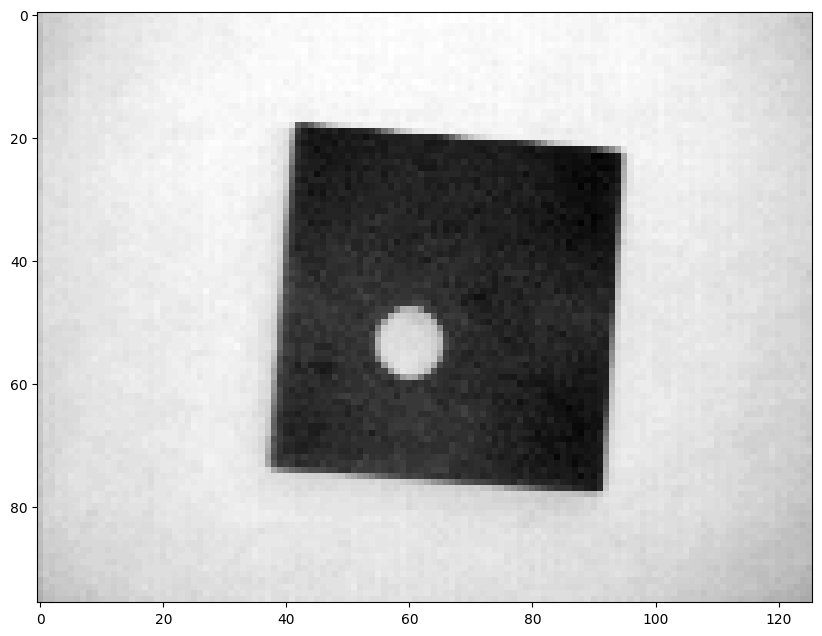

In [51]:
# Read image
image = cv2.imread("./images/wdg.png")

# Colors conversion
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(image)



* Write a function to threshold a gray scale image by using two threshold values as shown above. The values must satisfy the following conditions:
\begin{align}
Th1 < Th2 
\newline 
Th1 > 0 
\newline 
Th2 < I_{max}
\end{align}
where $I_{max}$ is the maximum intensity of the image.

In [52]:
#definition of a function to threshold the image with 2 differetn thresholds
def threshold_image(image, low, high):
    # Apply the thresholds
    thresholds = (image > low) & (image < high)
    return thresholds


* Take a look at the pixels intensity histogram using function ```matplotlib.pyplot.hist()``` and choose the best threshold values and segment the image.</li>

<class 'numpy.ndarray'>


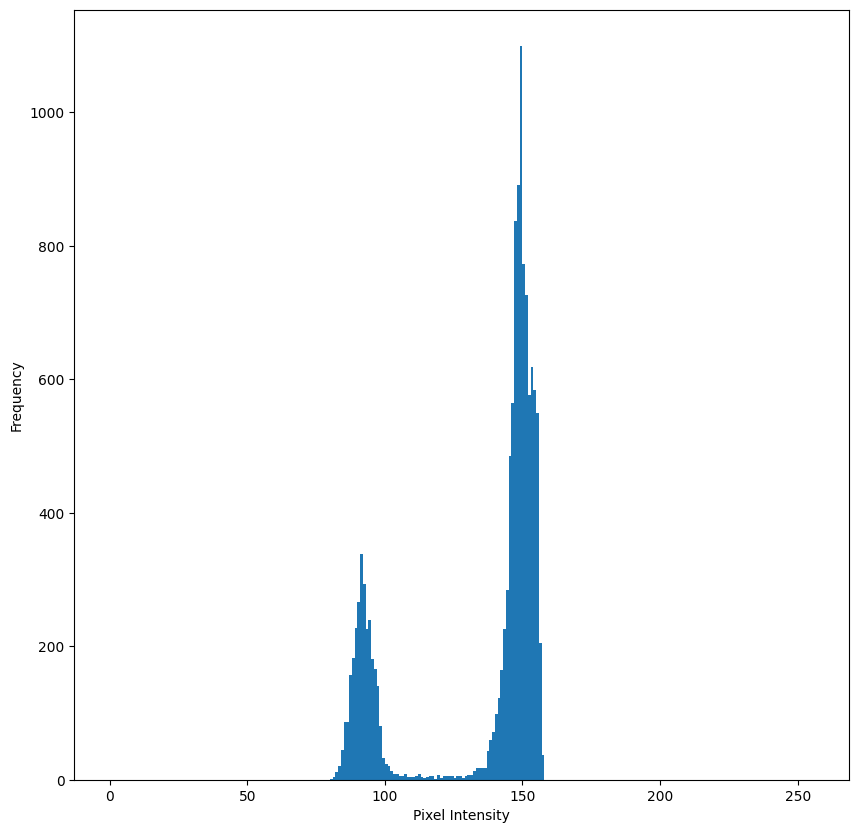

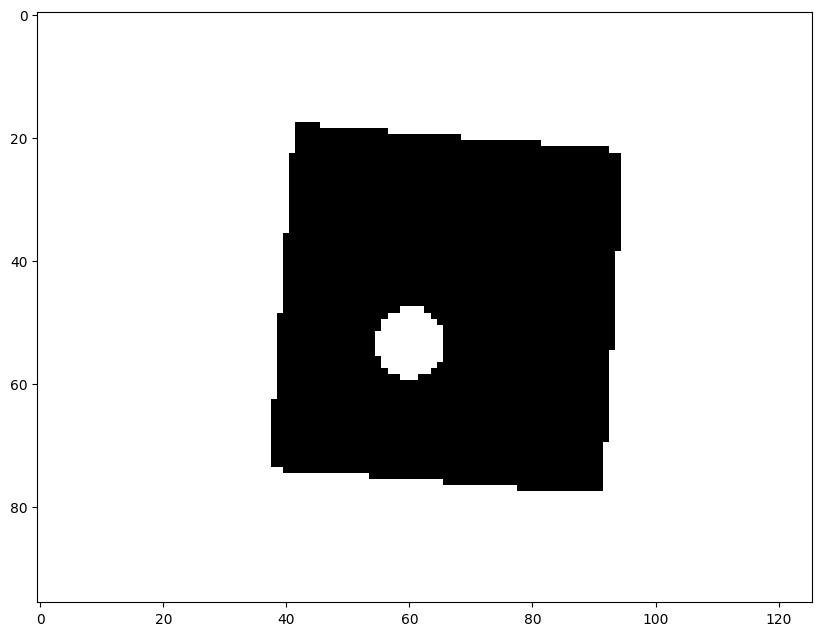

In [55]:
print(type(image))

# Calculate the histogram of the image
plt.hist(image.ravel(), 256, [0, 256])
#labels
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')



# Visualize the histogram
plt.show()

# Choose the threshold values based on the histogram analysis
th1 = 120
th2 = 180

# Apply thresholding to segment the image
thresholded_image = threshold_image(image, th1, th2)


# Display the segmented image
plt.imshow(thresholded_image, cmap='gray')
plt.show()

#Note: for visualizing the histogram of ALL pixels intensities 
#you have to convert 2D image matrix into 1D array with ravel()

* Repeat the same steps for images "brain.png" and "shading.png". What do you notice? What are the drawbacks of this segmentation method? </li>

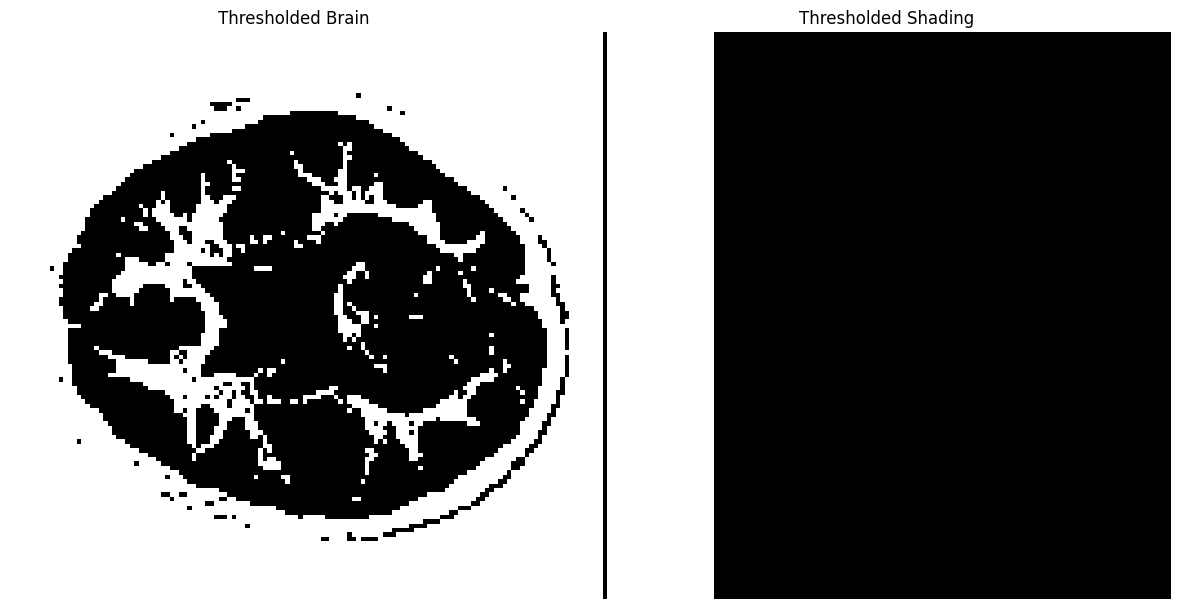

# Unlike the original image, these other ones do not have easily distinguishable background and foreground peaks in their intensity distribution, and as such our thresholding is not as useful for a good segmentation.


In [56]:
#import brain.png
brain = cv2.imread("./images/brain.png")
shading = cv2.imread("./images/shading.png")

#apply thresholding
th1 = 1
th2 = 50
#with this selection I am making black the darker part of the brain and the lighter of the shading
brain = cv2.cvtColor(brain, cv2.COLOR_BGR2GRAY)
shading = cv2.cvtColor(shading, cv2.COLOR_BGR2GRAY)
threshold_brain =  threshold_image(brain, th1, th2)
threshold_shading =  threshold_image(shading, th1, th2)

#show the images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(threshold_brain, cmap='gray')
axes[0].set_title('Thresholded Brain')
axes[0].axis('off')

axes[1].imshow(threshold_shading, cmap='gray')
axes[1].set_title('Thresholded Shading')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("# Unlike the original image, these other ones do not have easily distinguishable background and foreground peaks in their intensity distribution, and as such our thresholding is not as useful for a good segmentation.")

## Exercise 2: Background Substraction

Background subtraction is an important preprocessing step of many algorithms, e.g. object detection. In the following exercises we will try to subtract the scene background using multiple images.

### 2.1 Extracting a moving object

* Load the "street1.tiff" and the "street2.tiff" images. Visualize them.

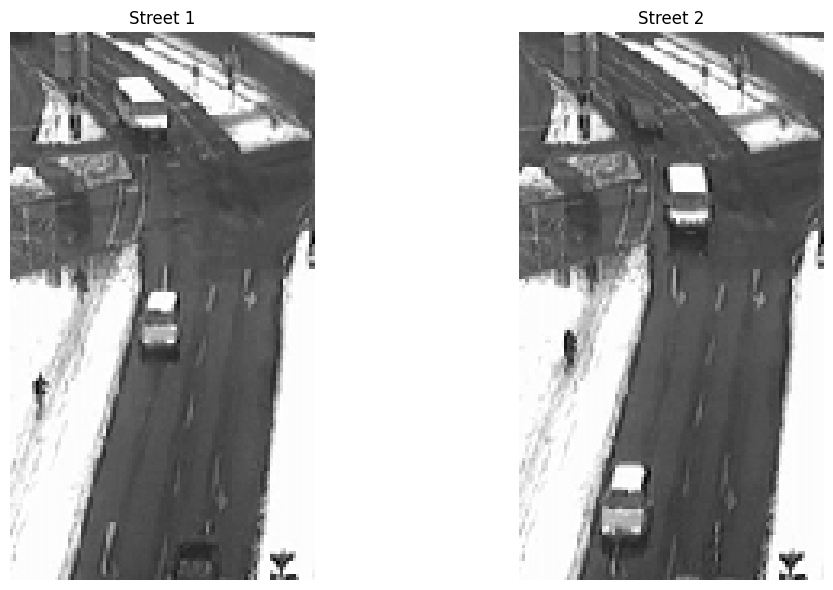

In [57]:
#load images
street1 = cv2.imread("./images/street1.tiff",cv2.IMREAD_GRAYSCALE)
street2 = cv2.imread("./images/street2.tiff",cv2.IMREAD_GRAYSCALE)


#visualize images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(street1)
axes[0].set_title('Street 1')
axes[0].axis('off')

axes[1].imshow(street2)
axes[1].set_title('Street 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()



* Transform the 8-bit images into float images. You can use image attribute ```dtype``` to check the type of image. To perform the type casting you can use ```np.float32()``` function. 

In [9]:
#check image type
# check image type
print(street1.dtype)
print(street2.dtype)

#perform type casting to convert into float images
street1float = np.float32(street1)/255.0
street2float = np.float32(street2)/255.0

#check image type
print(street1float.dtype)
print(street2float.dtype)

uint8
uint8
float32
float32


* Subtract the second image from the first one using basic matrix arithmetic operations. Visualize the results. Why was it important to do the casting before subtracting the images? 

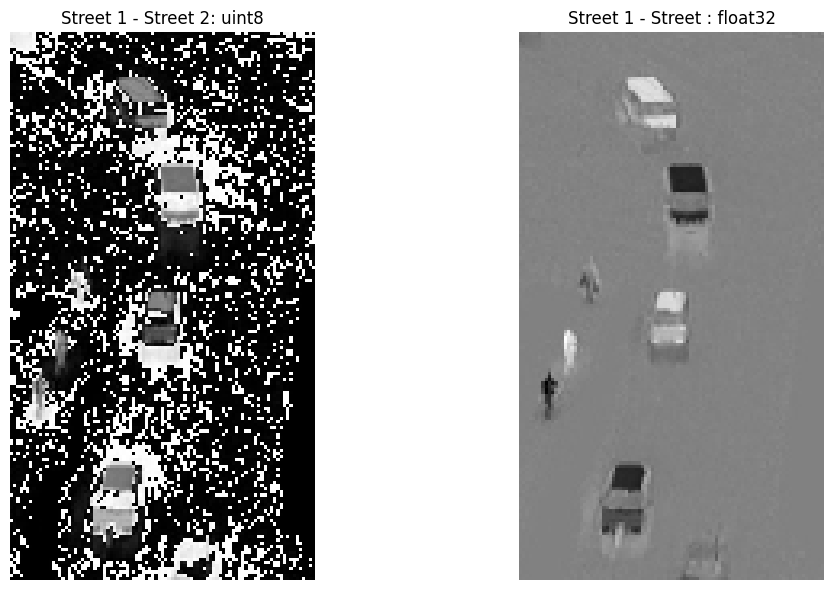

In [58]:

image_diff_uint8 = street1 - street2
image_diff = (street1float - street2float)

#visualize images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_diff_uint8)
axes[0].set_title('Street 1 - Street 2: uint8')
axes[0].axis('off')

image_diff = ((image_diff-np.min(image_diff))/(np.max(image_diff)-np.min(image_diff)))
axes[1].imshow(image_diff)
axes[1].set_title('Street 1 - Street : float32')
axes[1].axis('off')

plt.tight_layout()
plt.show()
 

### 2.2 Building a background model
For this exercise, you are given a sequence of images that contains pedestrians and we wish to segment with a background subtraction algorithm.

* Load and create a stack of images from the images inside ```images/sequence1```. Build a "background model" by averaging out the set of given images. Detect pedestrians
 subtracting the background model from the original images and applying the right threshold.

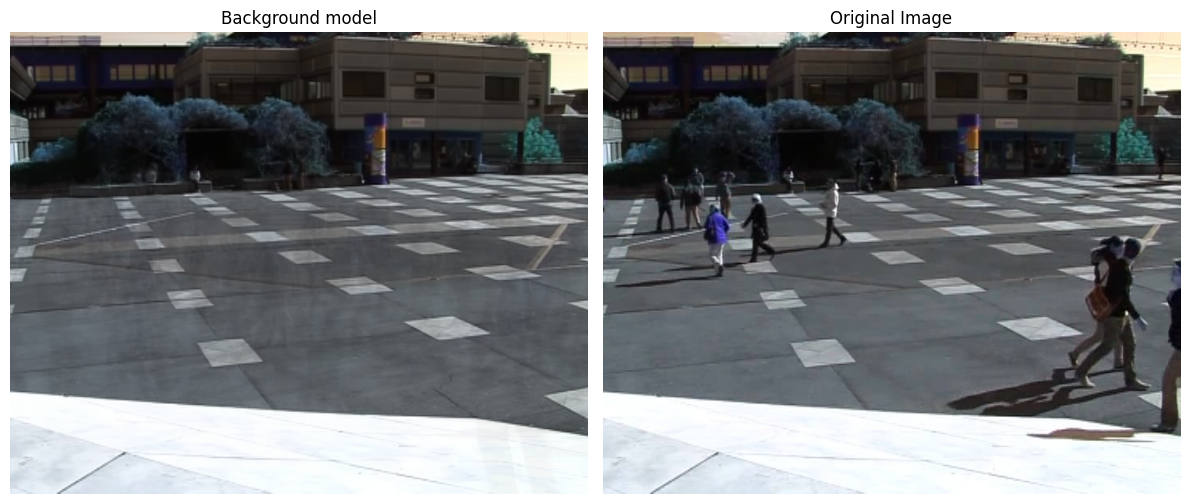

In [11]:
import matplotlib.pyplot as plt

# FILEPATH: /c:/Users/elisa/OneDrive/Desktop/Computer Vision/ExerciseSession1/exercise_session_1.ipynb
sq_of_images = listdir('images/sequence1/')  
sq_of_images = [img for img in sq_of_images if img.endswith(".jpg")]

# 'sq_of_images' holds the list of image names. Create an image stack using them.
image_stack = np.stack([cv2.imread('images/sequence1/' + img) for img in sq_of_images], axis=0)
    
# Compute the mean image using the stack and assign it to 'mean_image'.
mean_image = np.mean(image_stack, axis=0).astype(np.uint8)
            # since we need an accurate mean image, make sure to use floating point
            # we need to make the conversion - before - doing the calculation
# Subplot the two images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(mean_image)
axes[0].set_title('Background model')
axes[0].axis('off')

axes[1].imshow(image_stack[0])
axes[1].set_title('Original Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


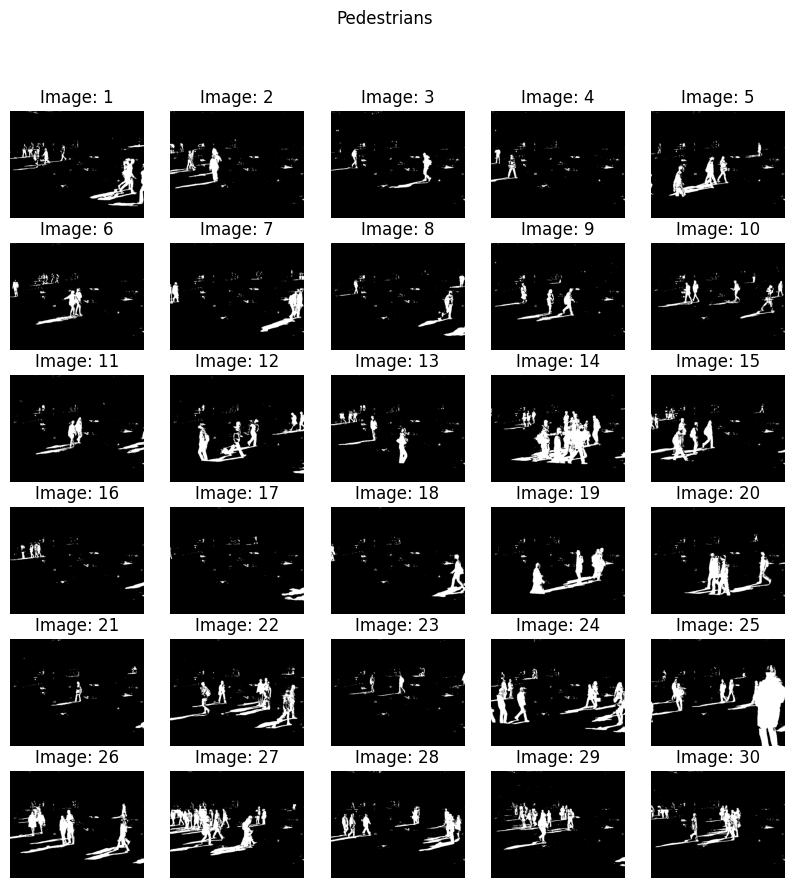

In [12]:
T = 0.1 
plt.figure(2)
plt.suptitle('Pedestrians')

# First convert the mean image to grayscale.
mean_image_gray = cv2.cvtColor(mean_image, cv2.COLOR_BGR2GRAY)
# When subtracting, each image must also be converted to grayscale.
image_stack_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in image_stack]

#Convert to float
mean_image_gray = np.float32(mean_image_gray)/255.0
image_stack_gray = [np.float32(img)/255.0 for img in image_stack_gray]


for i in range(len(image_stack)):
    # Compute the foreground image here. Assign it to 'foreground' variable.
    foreground = np.abs(image_stack_gray[i] - mean_image_gray) > T
    plt.subplot(6,5,i+1)
    plt.imshow(foreground, cmap='gray')
    plt.axis('off')
    plt.title('Image: ' + str(i+1))


* Create a more sophisticated background model, where each pixel can be modeled with a Gaussian distribution. We can classify a pixel as background if its current intensity ($I_t$) lies within some confidence interval of its distribution’s mean ($\mu(t)$):


\begin{align}
\frac{\mid{(I_t - \mu_t)}\mid}{\sigma_t} > T \rightarrow Foreground 
\newline
\frac{\mid{(I_t - \mu_t)}\mid}{\sigma_t} < T \rightarrow Background 
\end{align}

$\sigma_t$ is the standard deviation of the pixel $t$ in the background model. $T$ is the threshold.

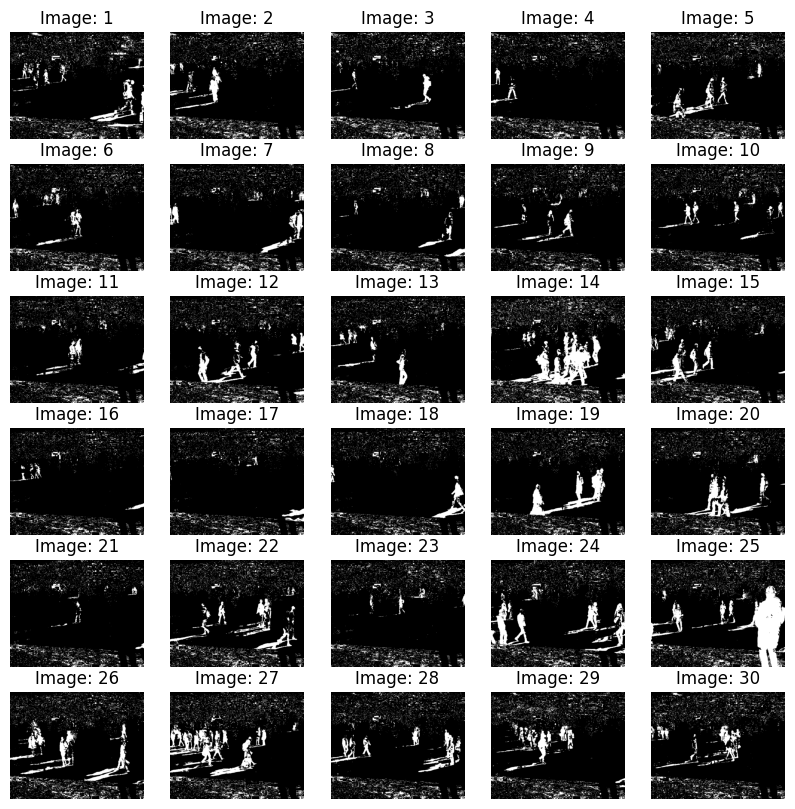

In [61]:
# Computes the standard deviation of the stack of images. 
# Since there are several pixels with zero standard deviation, we replace them 
# with a small value to avoid neumerical instability during division operation.
std =  np.std(image_stack_gray, axis=0) 
std[std==0] = 1e-30  

# Threshold. T = 2 means we consider any pixel that is more than 2*std away from the mean as
# a foreground pixel. 
T = 2
 
for i in range(len(image_stack_gray)):
    foreground = (np.abs(image_stack_gray[i] - mean_image_gray) / std) > T
    plt.subplot(6,5,i+1)
    plt.imshow(foreground)
    plt.axis('off')
    plt.title('Image: ' + str(i+1)) 





What difference do you notice between the two approaches? How does changing
the threshold affect them?

## Exercise 3: Connected Components

Segmentation can be also done for colour images. It is also often a first step for the further analysis e.g. measuring properties of the object. Here our goal is to count the number of apples in the image below.



* Read and display"apples.jpg" image.

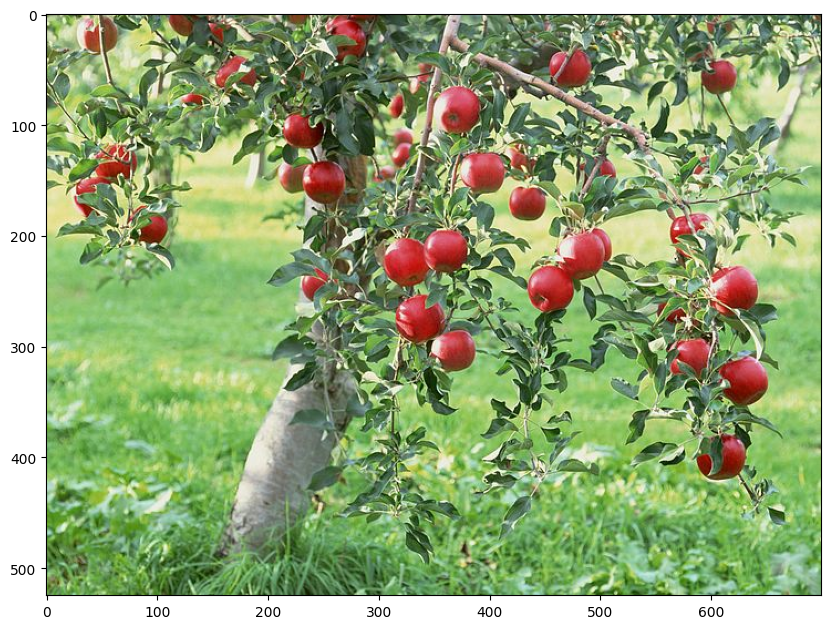

In [62]:
apple = cv2.imread("./images/apples.jpg")
# Note: OpenCV reads color images in order of BGR (blue, green, red channels) but pyplot visualizes them as RGB. 
# For the visualization purposes we will invert the order of channels

#show image 
b, g, r = cv2.split(apple)  # get b,g,r
apple = cv2.merge([r, g, b]) # switch it to rgb
plt.imshow(apple)

* Check the size of the image. Compared to the previous images it should have an additional dimension corresponding to three colour channels: red, green and blue. Visualize those 3 channels separately.

(525, 700, 3)


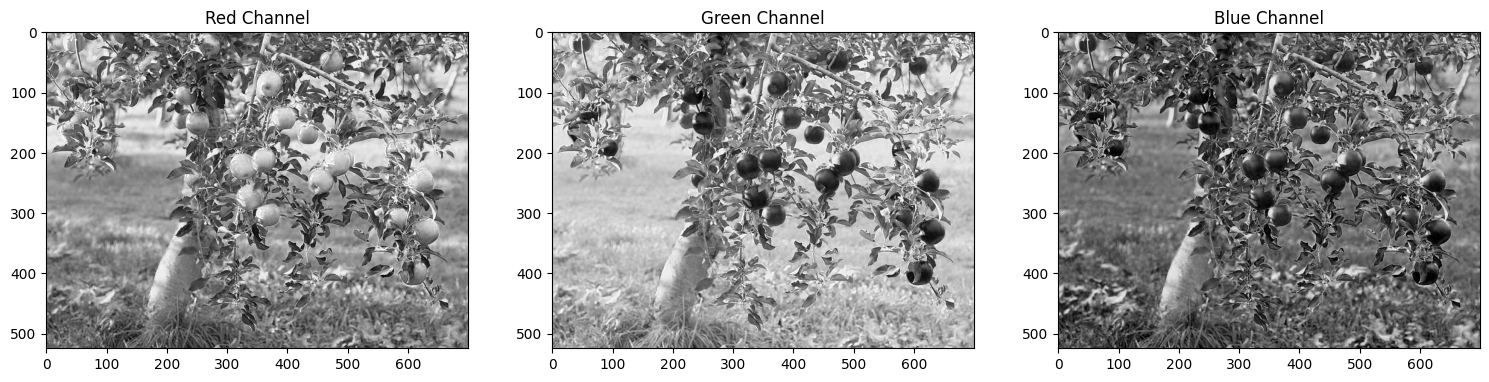

In [63]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
# add your code for visualizing three channels
axes[0].imshow(apple[:,:,0])
axes[1].imshow(apple[:,:,1])
axes[2].imshow(apple[:,:,2])

#add titles
axes[0].set_title('Red Channel')
axes[1].set_title('Green Channel')
axes[2].set_title('Blue Channel')


print(apple.shape)

* Try to obtain a binary image such that binary image == 1 for pixels representing apples and 0 otherwise. Which channel(s) would you use for that?

Best channel to use is red and green channel


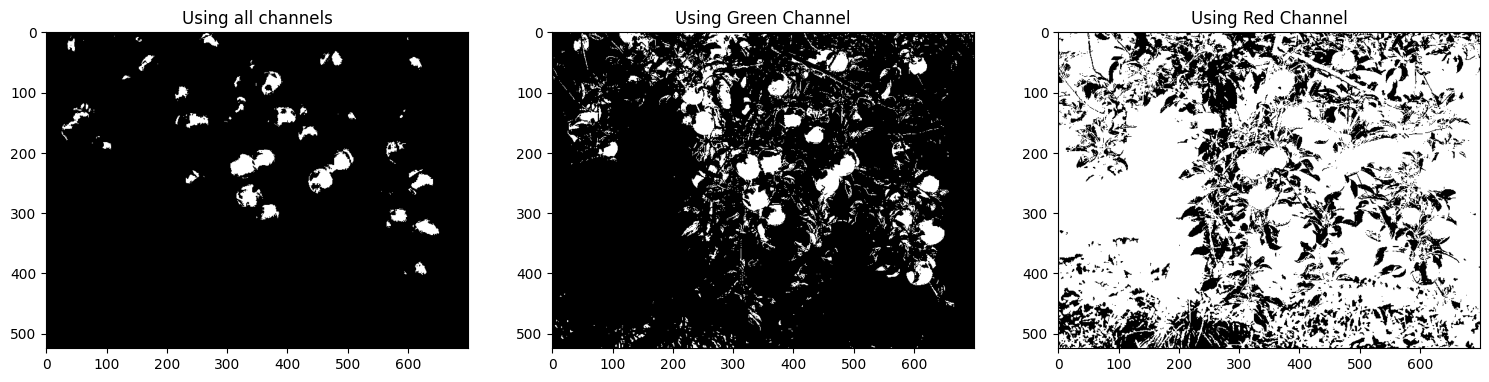

In [67]:
bin_img = np.zeros(apple.shape[0:2])
#add your code fot thresholding the image
bin_img = (apple[:,:,1] <100) & (apple[:,:,0] >150)
#using just green channel
bin_img_G = apple[:,:,1] < 80
bin_img_R = apple[:,:,0] > 100
#show the three bin images in a syubplot
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
axes[0].imshow(bin_img, cmap='gray')
axes[1].imshow(bin_img_G, cmap='gray')
axes[2].imshow(bin_img_R, cmap='gray')
#add titles
axes[0].set_title('Using all channels')
axes[1].set_title('Using Green Channel')
axes[2].set_title('Using Red Channel')

print("Best channel to use is red and green channel")

* Count the number of connected components in your binary image (here corresponding to apples). For this, you can use function ```measure.label()```. Its output is an array of the same size as input binary image, with each pixel assigned to a different connected component (ID). Visualize the image with detected connected components.

IO: A connected component, or an object, in a binary image is a set of adjacent pixels.

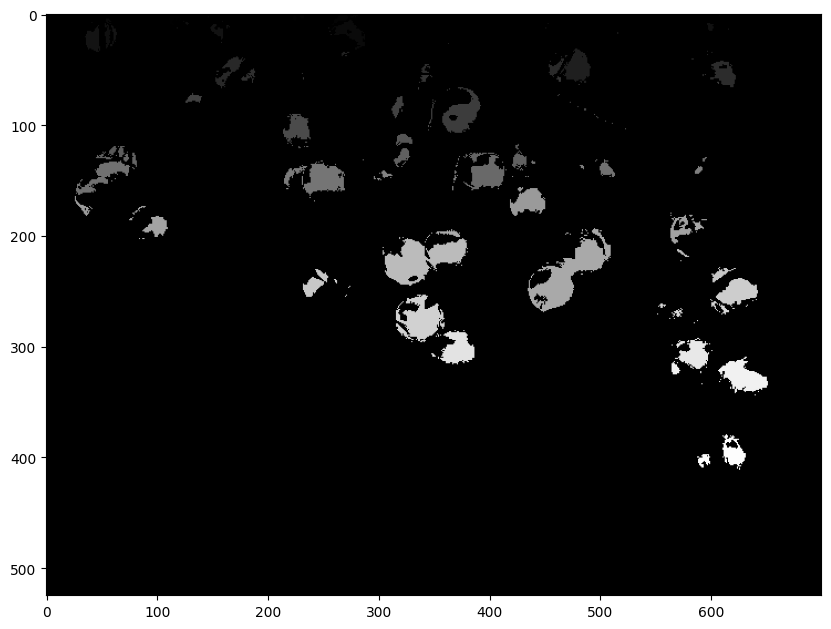

In [37]:
#add your code to find connected components
labels = measure.label(bin_img)
#visualize the connected components
plt.imshow(labels,cmap='nipy_spectral')

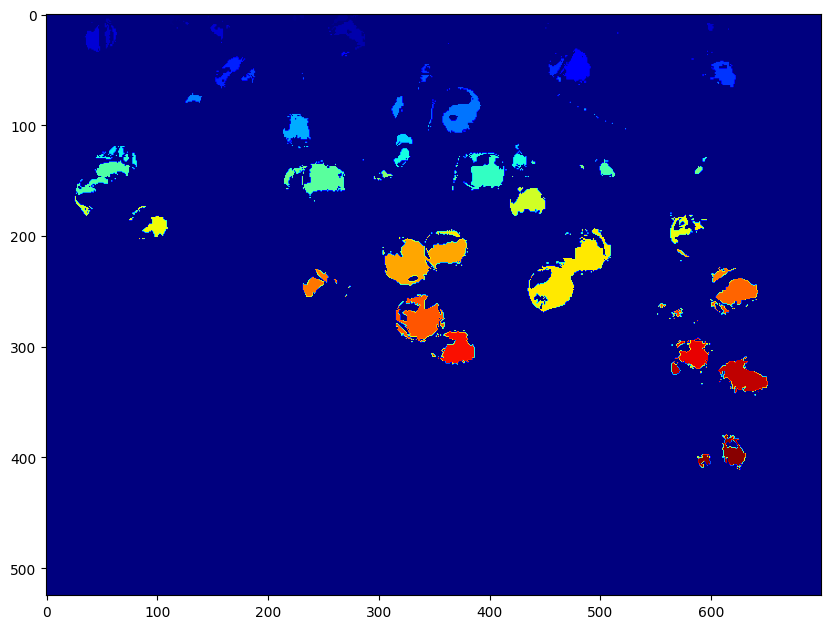

In [38]:
plt.imshow(labels,cmap="jet")

* Simple thresholding sometimes leads to detecting also noise in the background that is detected as seperate connected components. Try to suppress the noise by removing all connected components smaller than a user-defined threshold.

In [68]:
def remove_noise(label_img,threshold):
    label_img_new = np.zeros(label_img.shape)
    for region in measure.regionprops(label_img):
        if region.area > threshold:
            label_img_new[label_img == region.label] = region.label
    
    return label_img_new

#measure.regionprops(label_img) returns a list of region properties for each connected component in the image
#area is the number of pixels in the region
#threshold is the minimum number of pixels that a connected component must have to be considered as a valid object

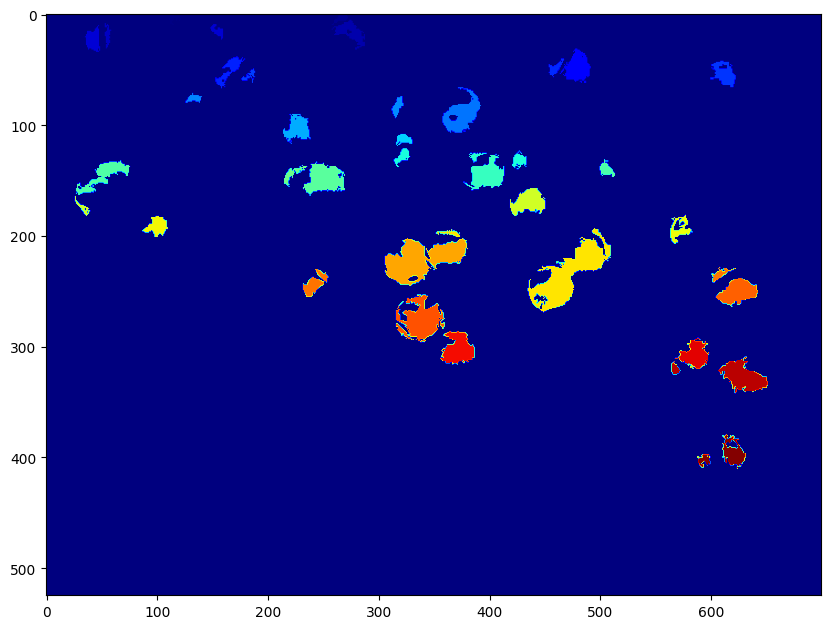

In [69]:
labels_new = remove_noise(labels,50)
plt.imshow(labels_new,cmap="jet")